In [1]:
# Loading in Statsbomb Competition and Match data
# This is a library for loading JSON files

import pandas as pd, json, requests

In [3]:
# Loading the Competition file

with open('/Users/alijazibrizvi/Documents/Data Analytics/SoccermaticsInPython/open-data-master/data/competitions.json') as f:
    competitions = json.load(f)
        
# FIFA (Men's) World Cup 2018 has Competition ID '43'
competition_id = 43

# Loading in  the list of Matches for this Competition; the 2018 FIFA World Cup!
with open('/Users/alijazibrizvi/Documents/Data Analytics/SoccermaticsInPython/open-data-master/data/matches/' + str(competition_id)+'/3.json') as f:
    matches = json.load(f)

In [5]:
# Let's Look inside the Matches

# matches[0]
# matches[0]['home_team']
# matches[0]['home_team']['home_team_name']
# matches[0]['away_team']['away_team_name']

# Let's Print all Match Results

for match in matches:
    home_team_name=match['home_team']['home_team_name']
    away_team_name=match['away_team']['away_team_name']
    home_score=match['home_score']
    away_score=match['away_score']
    describe_text = 'The match between ' + home_team_name + ' and ' + away_team_name
    result_text = ' finished ' + str(home_score) +  ' : ' + str(away_score)
    print(describe_text + result_text)

The match between Colombia and England finished 1 : 1
The match between England and Belgium finished 0 : 1
The match between Sweden and Switzerland finished 1 : 0
The match between Iran and Portugal finished 1 : 1
The match between Portugal and Morocco finished 1 : 0
The match between Croatia and England finished 2 : 1
The match between England and Panama finished 6 : 1
The match between Serbia and Switzerland finished 1 : 2
The match between Brazil and Costa Rica finished 2 : 0
The match between Egypt and Uruguay finished 0 : 1
The match between South Korea and Mexico finished 1 : 2
The match between Uruguay and Saudi Arabia finished 1 : 0
The match between Belgium and Panama finished 3 : 0
The match between Poland and Colombia finished 0 : 3
The match between France and Peru finished 1 : 0
The match between Poland and Senegal finished 1 : 2
The match between Sweden and South Korea finished 1 : 0
The match between Portugal and Spain finished 3 : 3
The match between Serbia and Brazil f

In [7]:
# Now let's find a Match we are Interested in
home_team_required = "England"
away_team_required = "Panama"

# Find ID for the Match^
for match in matches:
    home_team_name=match['home_team']['home_team_name']
    away_team_name=match['away_team']['away_team_name']
    if (home_team_name == home_team_required) and (away_team_name == away_team_required):
        match_id_required = match['match_id']
print(home_team_required + ' vs ' + away_team_required + ' has id: ' + str(match_id_required))

England vs Panama has id: 7554


## Let's View as a DataFrame & Play Around with it

In [11]:
# Make a Shot Map and a Pass Map using Statsbomb Data
# Set "match id" in "match_id_required"

# Function to draw the pitch
import matplotlib.pyplot as plt
import numpy as np

# Size of the pitch in yards (!!!)
pitchLengthX = 120
pitchWidthY = 80

# ID for England vs Sweden Womens World Cup
match_id_required = 7554
home_team_required = "England"
away_team_required = "Panama"

# Loading in the data
file_name = str(match_id_required) + '.json'

# Loading in all Match Events 
import json
with open('/Users/alijazibrizvi/Documents/Data Analytics/SoccermaticsInPython/open-data-master/data/events/' + file_name) as data_file:
    #print (mypath+'events/'+file)
    data = json.load(data_file)

# Getting the Nested Structure into a DataFrame 
# Storing the DataFrame in a Dictionary with the "match id" as Key (Remove '.json' from string)
from pandas import json_normalize
df = json_normalize(data, sep = "_").assign(match_id = file_name[:-5])

pd.set_option('display.max_columns', None)
df.head(6)

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,dribble_outcome_id,dribble_outcome_name,pass_cross,pass_cut_back,counterpress,duel_type_id,duel_type_name,duel_outcome_id,duel_outcome_name,foul_won_defensive,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,interception_outcome_id,interception_outcome_name,shot_statsbomb_xg,shot_end_location,shot_technique_id,shot_technique_name,shot_type_id,shot_type_name,shot_body_part_id,shot_body_part_name,shot_outcome_id,shot_outcome_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_type_id,goalkeeper_type_name,pass_assisted_shot_id,pass_shot_assist,shot_key_pass_id,shot_first_time,pass_switch,pass_technique_id,pass_technique_name,pass_through_ball,ball_recovery_recovery_failure,pass_goal_assist,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_outcome_id,goalkeeper_outcome_name,pass_backheel,foul_committed_card_id,foul_committed_card_name,pass_aerial_won,miscontrol_aerial_won,foul_committed_advantage,foul_won_advantage,injury_stoppage_in_chain,foul_committed_penalty,foul_won_penalty,pass_deflected,block_deflection,goalkeeper_body_part_id,goalkeeper_body_part_name,shot_open_goal,block_offensive,bad_behaviour_card_id,bad_behaviour_card_name,foul_committed_type_id,foul_committed_type_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,shot_one_on_one,clearance_aerial_won,foul_committed_offensive,match_id
0,46ae5bf2-1cd5-4116-b88f-e223b4b22b5a,1,1,00:00:00.000,0,0,1,0.000,35,Starting XI,768,England,1,Regular Play,768,England,352.0,"[{'player': {'id': 3468, 'name': 'Jordan Pickf...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7554
1,06c697b4-556c-47bc-a67f-49c4e41a675b,2,1,00:00:00.000,0,0,1,0.000,35,Starting XI,768,England,1,Regular Play,798,Panama,4141.0,"[{'player': {'id': 5636, 'name': 'Jaime Manuel...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7554
2,f8723e4b-f739-475c-b67c-01c925ae6246,3,1,00:00:00.000,0,0,1,8.093,18,Half Start,768,England,1,Regular Play,768,England,NaN,NaN,[ebedddcc-05ef-4c37-b0be-2776b1d9de50],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7554
3,ebedddcc-05ef-4c37-b0be-2776b1d9de50,4,1,00:00:00.000,0,0,1,8.653,18,Half Start,768,England,1,Regular Play,798,Panama,NaN,NaN,[f8723e4b-f739-475c-b67c-01c925ae6246],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
# Defining the "createPitch" function Make a Pitch Map

import matplotlib.pyplot as plt
from matplotlib.patches import Arc

def createPitch(length,width, unity,linecolor): # in meters
    # Code by @JPJ_dejong

    """
    creates a plot in which the 'length' is the length of the pitch (goal to goal).
    And 'width' is the width of the pitch (sideline to sideline). 
    Fill in the unity in meters or in yards.

    """
    #Set unity
    if unity == "meters":
        # Set boundaries
        if length >= 120.5 or width >= 75.5:
            return(str("Field dimensions are too big for meters as unity, didn't you mean yards as unity?\
                       Otherwise the maximum length is 120 meters and the maximum width is 75 meters. Please try again"))
        #Run program if unity and boundaries are accepted
        else:
            #Create figure
            fig=plt.figure()
            #fig.set_size_inches(7, 5)
            ax=fig.add_subplot(1,1,1)
           
            #Pitch Outline & Centre Line
            plt.plot([0,0],[0,width], color=linecolor)
            plt.plot([0,length],[width,width], color=linecolor)
            plt.plot([length,length],[width,0], color=linecolor)
            plt.plot([length,0],[0,0], color=linecolor)
            plt.plot([length/2,length/2],[0,width], color=linecolor)
            
            #Left Penalty Area
            plt.plot([16.5 ,16.5],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
            plt.plot([0,16.5],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
            plt.plot([16.5,0],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)
            
            #Right Penalty Area
            plt.plot([(length-16.5),length],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
            plt.plot([(length-16.5), (length-16.5)],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
            plt.plot([(length-16.5),length],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)
            
            #Left 5-meters Box
            plt.plot([0,5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
            plt.plot([5.5,5.5],[(width/2+7.32/2+5.5),(width/2-7.32/2-5.5)],color=linecolor)
            plt.plot([5.5,0.5],[(width/2-7.32/2-5.5),(width/2-7.32/2-5.5)],color=linecolor)
            
            #Right 5 -eters Box
            plt.plot([length,length-5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
            plt.plot([length-5.5,length-5.5],[(width/2+7.32/2+5.5),width/2-7.32/2-5.5],color=linecolor)
            plt.plot([length-5.5,length],[width/2-7.32/2-5.5,width/2-7.32/2-5.5],color=linecolor)
            
            #Prepare Circles
            centreCircle = plt.Circle((length/2,width/2),9.15,color=linecolor,fill=False)
            centreSpot = plt.Circle((length/2,width/2),0.8,color=linecolor)
            leftPenSpot = plt.Circle((11,width/2),0.8,color=linecolor)
            rightPenSpot = plt.Circle((length-11,width/2),0.8,color=linecolor)
            
            #Draw Circles
            ax.add_patch(centreCircle)
            ax.add_patch(centreSpot)
            ax.add_patch(leftPenSpot)
            ax.add_patch(rightPenSpot)
            
            #Prepare Arcs
            leftArc = Arc((11,width/2),height=18.3,width=18.3,angle=0,theta1=308,theta2=52,color=linecolor)
            rightArc = Arc((length-11,width/2),height=18.3,width=18.3,angle=0,theta1=128,theta2=232,color=linecolor)
            
            #Draw Arcs
            ax.add_patch(leftArc)
            ax.add_patch(rightArc)
            #Axis titles

    #check unity again
    elif unity == "yards":
        #check boundaries again
        if length <= 95:
            return(str("Didn't you mean meters as unity?"))
        elif length >= 131 or width >= 101:
            return(str("Field dimensions are too big. Maximum length is 130, maximum width is 100"))
        #Run program if unity and boundaries are accepted
        else:
            #Create figure
            fig=plt.figure()
            #fig.set_size_inches(7, 5)
            ax=fig.add_subplot(1,1,1)
           
            #Pitch Outline & Centre Line
            plt.plot([0,0],[0,width], color=linecolor)
            plt.plot([0,length],[width,width], color=linecolor)
            plt.plot([length,length],[width,0], color=linecolor)
            plt.plot([length,0],[0,0], color=linecolor)
            plt.plot([length/2,length/2],[0,width], color=linecolor)
            
            #Left Penalty Area
            plt.plot([18 ,18],[(width/2 +18),(width/2-18)],color=linecolor)
            plt.plot([0,18],[(width/2 +18),(width/2 +18)],color=linecolor)
            plt.plot([18,0],[(width/2 -18),(width/2 -18)],color=linecolor)
            
            #Right Penalty Area
            plt.plot([(length-18),length],[(width/2 +18),(width/2 +18)],color=linecolor)
            plt.plot([(length-18), (length-18)],[(width/2 +18),(width/2-18)],color=linecolor)
            plt.plot([(length-18),length],[(width/2 -18),(width/2 -18)],color=linecolor)
            
            #Left 6-yard Box
            plt.plot([0,6],[(width/2+7.32/2+6),(width/2+7.32/2+6)],color=linecolor)
            plt.plot([6,6],[(width/2+7.32/2+6),(width/2-7.32/2-6)],color=linecolor)
            plt.plot([6,0],[(width/2-7.32/2-6),(width/2-7.32/2-6)],color=linecolor)
            
            #Right 6-yard Box
            plt.plot([length,length-6],[(width/2+7.32/2+6),(width/2+7.32/2+6)],color=linecolor)
            plt.plot([length-6,length-6],[(width/2+7.32/2+6),width/2-7.32/2-6],color=linecolor)
            plt.plot([length-6,length],[(width/2-7.32/2-6),width/2-7.32/2-6],color=linecolor)
            
            #Prepare Circles; 10 yards distance. penalty on 12 yards
            centreCircle = plt.Circle((length/2,width/2),10,color=linecolor,fill=False)
            centreSpot = plt.Circle((length/2,width/2),0.8,color=linecolor)
            leftPenSpot = plt.Circle((12,width/2),0.8,color=linecolor)
            rightPenSpot = plt.Circle((length-12,width/2),0.8,color=linecolor)
            
            #Draw Circles
            ax.add_patch(centreCircle)
            ax.add_patch(centreSpot)
            ax.add_patch(leftPenSpot)
            ax.add_patch(rightPenSpot)
            
            #Prepare Arcs
            leftArc = Arc((11,width/2),height=20,width=20,angle=0,theta1=312,theta2=48,color=linecolor)
            rightArc = Arc((length-11,width/2),height=20,width=20,angle=0,theta1=130,theta2=230,color=linecolor)
            
            #Draw Arcs
            ax.add_patch(leftArc)
            ax.add_patch(rightArc)
                
    #Tidy Axes
    plt.axis('off')
    
    return fig,ax


def createPitchOld():
    #Taken from FC Python        
    #Create figure
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,90], color=linecolor)
    plt.plot([0,130],[90,90], color=linecolor)
    plt.plot([130,130],[90,0], color=linecolor)
    plt.plot([130,0],[0,0], color=linecolor)
    plt.plot([65,65],[0,90], color=linecolor)
    
    #Left Penalty Area
    plt.plot([16.5,16.5],[65,25],color=linecolor)
    plt.plot([0,16.5],[65,65],color=linecolor)
    plt.plot([16.5,0],[25,25],color=linecolor)
    
    #Right Penalty Area
    plt.plot([130,113.5],[65,65],color=linecolor)
    plt.plot([113.5,113.5],[65,25],color=linecolor)
    plt.plot([113.5,130],[25,25],color=linecolor)
    
    #Left 6-yard Box
    plt.plot([0,5.5],[54,54],color=linecolor)
    plt.plot([5.5,5.5],[54,36],color=linecolor)
    plt.plot([5.5,0.5],[36,36],color=linecolor)
    
    #Right 6-yard Box
    plt.plot([130,124.5],[54,54],color=linecolor)
    plt.plot([124.5,124.5],[54,36],color=linecolor)
    plt.plot([124.5,130],[36,36],color=linecolor)
    
    #Prepare Circles
    centreCircle = plt.Circle((65,45),9.15,color=linecolor,fill=False)
    centreSpot = plt.Circle((65,45),0.8,color=linecolor)
    leftPenSpot = plt.Circle((11,45),0.8,color=linecolor)
    rightPenSpot = plt.Circle((119,45),0.8,color=linecolor)
    
    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    
    #Prepare Arcs
    leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color=linecolor)
    rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color=linecolor)

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    #Tidy Axes
    plt.axis('off')
    
    return fig,ax

def createGoalMouth():
    #Adopted from FC Python
    #Create figure
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    linecolor='black'

    #Pitch Outline & Centre Line
    plt.plot([0,65],[0,0], color=linecolor)
    plt.plot([65,65],[50,0], color=linecolor)
    plt.plot([0,0],[50,0], color=linecolor)
    
    #Left Penalty Area
    plt.plot([12.5,52.5],[16.5,16.5],color=linecolor)
    plt.plot([52.5,52.5],[16.5,0],color=linecolor)
    plt.plot([12.5,12.5],[0,16.5],color=linecolor)
    
    #Left 6-yard Box
    plt.plot([41.5,41.5],[5.5,0],color=linecolor)
    plt.plot([23.5,41.5],[5.5,5.5],color=linecolor)
    plt.plot([23.5,23.5],[0,5.5],color=linecolor)
    
    #Goal
    plt.plot([41.5-5.34,41.5-5.34],[-2,0],color=linecolor)
    plt.plot([23.5+5.34,41.5-5.34],[-2,-2],color=linecolor)
    plt.plot([23.5+5.34,23.5+5.34],[0,-2],color=linecolor)
    
    #Prepare Circles
    leftPenSpot = plt.Circle((65/2,11),0.8,color=linecolor)
    
    #Draw Circles
    ax.add_patch(leftPenSpot)
    
    #Prepare Arcs
    leftArc = Arc((32.5,11),height=18.3,width=18.3,angle=0,theta1=38,theta2=142,color=linecolor)
    
    #Draw Arcs
    ax.add_patch(leftArc)
    
    #Tidy Axes
    plt.axis('off')
    
    return fig,ax

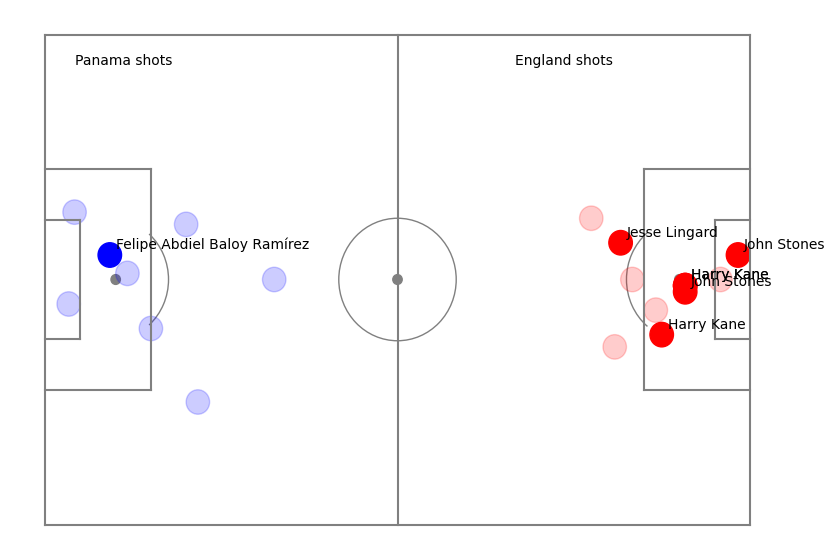

In [8]:
# A DataFrame of Shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')
    
# Drawing the Pitch
## from FCPython import createPitch
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')

# Plotting the Shots
for i,shot in shots.iterrows():
    x = shot['location'][0]
    y = shot['location'][1]
    
    goal = shot['shot_outcome_name'] == 'Goal'
    team_name = shot['team_name']
    
    circleSize=2
    ## circleSize = np.sqrt(shot['shot_statsbomb_xg'])*12

    if (team_name==home_team_required):
        if goal:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")
            plt.text((x+1),pitchWidthY-y+1,shot['player_name']) 
        else:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")     
            shotCircle.set_alpha(.2)
    elif (team_name==away_team_required):
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue") 
            plt.text((pitchLengthX-x+1),y+1,shot['player_name']) 
        else:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue")      
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
    
plt.text(5,75,away_team_required + ' shots') 
plt.text(80,75,home_team_required + ' shots') 
     
fig.set_size_inches(10, 7)
## fig.savefig('Output/shots.pdf', dpi=100)
plt.show()

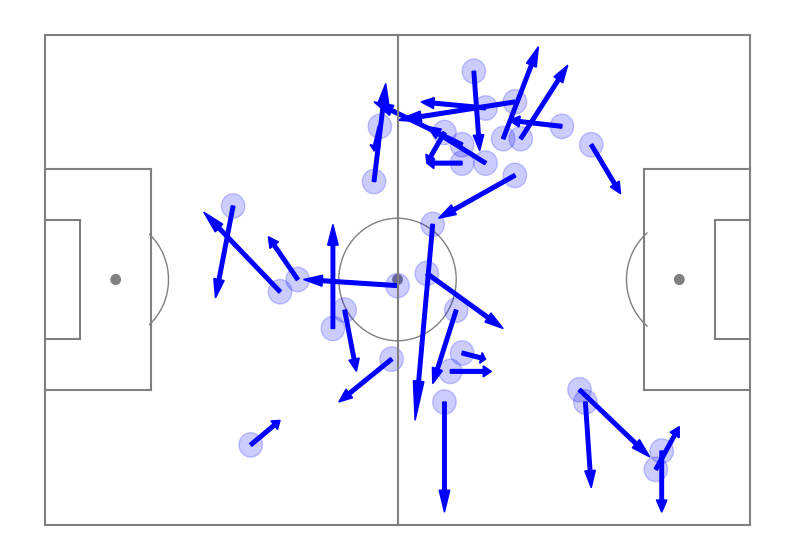

In [9]:
# Jesse Lingard's (England) Passes

# Find the Passes
passes = df.loc[df['type_name'] == 'Pass'].set_index('id')

# Draw the Pitch
(fig,ax) = createPitch(pitchLengthX, pitchWidthY, 'yards', 'gray')
for i,thepass in passes.iterrows():
    #if thepass['team_name'] == away_team_required: #
    if thepass['player_name'] == 'Jesse Lingard':
        x = thepass['location'][0]
        y = thepass['location'][1]
        passCircle=plt.Circle((x, pitchWidthY-y),2, color = "blue")      
        passCircle.set_alpha(.2)   
        ax.add_patch(passCircle)
        dx = thepass['pass_end_location'][0]-x
        dy = thepass['pass_end_location'][1]-y

        passArrow = plt.Arrow(x, pitchWidthY-y, dx, -dy,width = 3, color = "blue")
        ax.add_patch(passArrow)

fig.set_size_inches(10, 7)
## fig.savefig('Output/passes.pdf', dpi=100) 
plt.show()

## xG Model

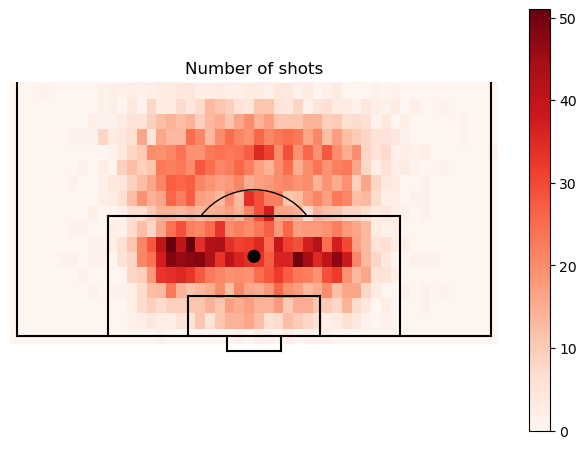

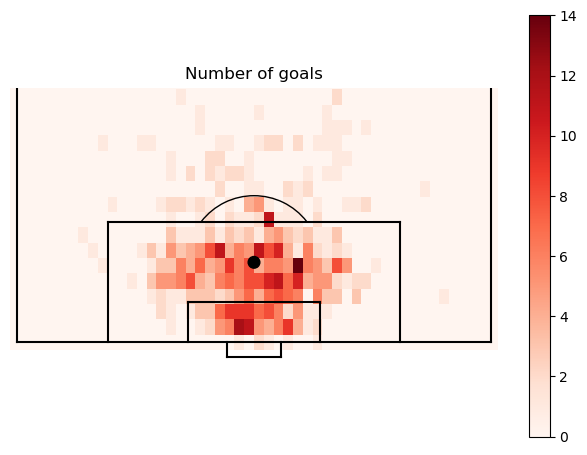

/var/folders/j3/3j69h7bd37v9q0182sm6scrh0000gn/T/ipykernel_24265/3242237880.py:90: RuntimeWarning: invalid value encountered in divide
  pos=ax.imshow(H_Goal[0]/H_Shot[0], extent = [-1,66, 104, -1], aspect = 'auto', cmap = plt.cm.Reds, vmin = 0, vmax = 0.5)


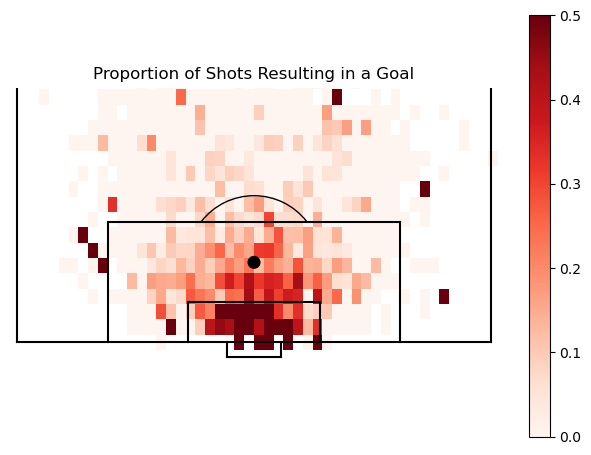

In [11]:
# The Basics
import pandas as pd
import numpy as np
import json

# Plotting
import matplotlib.pyplot as plt
## import FCPython 

# Statistical Fitting of Models
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Decide which League to Load
# Wyscout Data from https://figshare.com/collections/Soccer_match_event_dataset/4415000/2
with open('/Users/alijazibrizvi/Documents/Data Analytics/SoccermaticsInPython/Wyscout/events/events_England.json') as f:
    data = json.load(f)
    
# Creating a Dataset of Shots
train = pd.DataFrame(data)
pd.unique(train['subEventName'])
shots = train[train['subEventName'] == 'Shot']
shots_model = pd.DataFrame(columns = ['Goal', 'X', 'Y'])

# Go through the dataframe and calculate X, Y co-ordinates.
# Distance from a line in the centre
# Shot angle.
# Details of tags can be found here: https://apidocs.wyscout.com/matches-wyid-events
for i,shot in shots.iterrows():
    
    header = 0
    for shottags in shot['tags']:
        if shottags['id'] == 403:
            header = 1
    # Only include non-headers        
    if not(header):        
        shots_model.at[i, 'X'] = 100 - shot['positions'][0]['x']
        shots_model.at[i, 'Y'] = shot['positions'][0]['y']
        shots_model.at[i, 'C'] = abs(shot['positions'][0]['y']-50)
    
        #Distance in metres and shot angle in radians.
        x = shots_model.at[i, 'X']*105/100
        y = shots_model.at[i, 'C']*65/100
        shots_model.at[i, 'Distance'] = np.sqrt(x**2 + y**2)
        a = np.arctan(7.32 *x /(x**2 + y**2 - (7.32/2)**2))
        if a < 0:
            a = np.pi + a
        shots_model.at[i,'Angle'] = a
    
        #Was it a goal
        shots_model.at[i,'Goal'] = 0
        for shottags in shot['tags']:
                #Tags contain that its a goal
                if shottags['id'] == 101:
                    shots_model.at[i, 'Goal']=1

# Two Dimensional Histogram
H_Shot = np.histogram2d(shots_model['X'], shots_model['Y'], bins = 50, range = [[0, 100],[0, 100]])
goals_only = shots_model[shots_model['Goal'] == 1]
H_Goal = np.histogram2d(goals_only['X'], goals_only['Y'], bins = 50, range = [[0, 100],[0, 100]])

# Plotting the Number of Shots from Different Points
(fig,ax) = createGoalMouth()
pos = ax.imshow(H_Shot[0], extent = [-1,66, 104,-1], aspect = 'auto', cmap = plt.cm.Reds)
fig.colorbar(pos, ax = ax)
ax.set_title('Number of shots')
plt.xlim((-1, 66))
plt.ylim((-3, 35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable = 'box')
plt.show()
##fig.savefig('Output/NumberOfShots.pdf', dpi=None, bbox_inches="tight")   


# Plotting the Number of GOALS from Different Points
(fig,ax) = createGoalMouth()
pos=ax.imshow(H_Goal[0], extent = [-1,66, 104, -1], aspect = 'auto', cmap = plt.cm.Reds)
fig.colorbar(pos, ax = ax)
ax.set_title('Number of goals')
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable = 'box')
plt.show()
##fig.savefig('Output/NumberOfGoals.pdf', dpi=None, bbox_inches="tight")   


# Plotting the Probability of Scoring from Different Points
(fig,ax) = createGoalMouth()
pos=ax.imshow(H_Goal[0]/H_Shot[0], extent = [-1,66, 104, -1], aspect = 'auto', cmap = plt.cm.Reds, vmin = 0, vmax = 0.5)
fig.colorbar(pos, ax = ax)
ax.set_title('Proportion of Shots Resulting in a Goal')
plt.xlim((-1, 66))
plt.ylim((-3, 35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable = 'box')
plt.show()
## fig.savefig('Output/ProbabilityOfScoring.pdf', dpi=None, bbox_inches="tight")   

### Loading in and Saving Another CSV file for Further Analyses, Later

In [13]:
# Advanced Analytics with the DataFrame for the 2018 (Men's) FIFA World Cup, also in SQL

# with open('/Users/alijazibrizvi/Documents/Data Analytics/SoccermaticsInPython/open-data-master/data/matches/43/3.json') as f:
#     match433 = json.load(f)

# pd.set_option('display.max_columns', None)
# df10 = json_normalize(match433, sep = "_").assign(match_id = file_name[:-5])

# # Will Save as a CSV file for Further Analysis in SQL
# df10.to_csv('/Users/alijazibrizvi/Documents/Data Analytics/SoccermaticsInPython/fifawc2018.csv')

## Linear Regression Model:

Predicting Goals Scored based on Minutes Played.

In [15]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Data
minutes_played = np.array([120, 452, 185, 708, 340, 561])
goals_scored = np.array([1, 6, 3, 7, 3, 5])

# DataFrame
minutes_model = pd.DataFrame({
    "minutes_played": minutes_played,
    "goals_scored": goals_scored
})

# OLS Regression
model_fit = smf.ols(formula = 'goals_scored ~ minutes_played', data = minutes_model).fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:           goals_scored   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     23.41
Date:                Tue, 26 Aug 2025   Prob (F-statistic):            0.00841
Time:                        16:03:57   Log-Likelihood:                -7.0012
No. Observations:                   6   AIC:                             18.00
Df Residuals:                       4   BIC:                             17.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5456      0.843      0.

/Users/alijazibrizvi/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


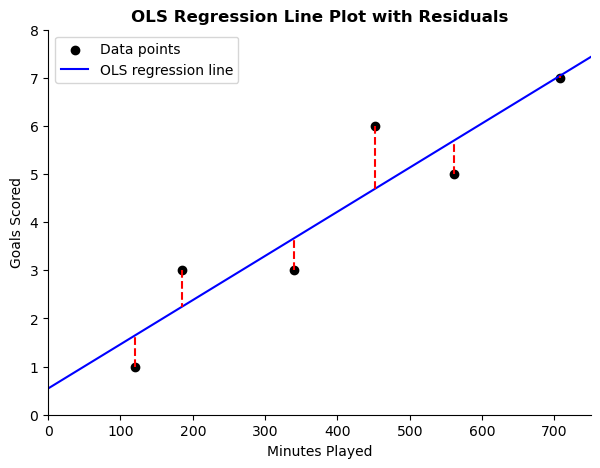

In [16]:
# OLS Regression Plot + Residuals

# Regression line Values
x = np.linspace(0, 750, 100)
y_pred = model_fit.params['Intercept'] + model_fit.params['minutes_played'] * x

# The Plot
fig, ax = plt.subplots(figsize=(7,5))

# Scatter Plot
ax.scatter(minutes_played, goals_scored, color = 'black', label = "Data points")

# Regression Line
ax.plot(x, y_pred, color='blue', label = "OLS regression line")

# Residuals
for i, mp in enumerate(minutes_played):
    y_hat = model_fit.params['Intercept'] + model_fit.params['minutes_played'] * mp
    ax.plot([mp, mp], [goals_scored[i], y_hat], color = 'red', linestyle = '--')

# Aesthetics
ax.set_xlabel("Minutes Played")
ax.set_ylabel("Goals Scored")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("OLS Regression Line Plot with Residuals", fontweight = 'bold')
plt.xlim((0, 750))
plt.ylim((0, 8))
ax.legend()
plt.show()

## Match Simulation:

Also uses Poisson Distribution.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam

epl = pd.read_csv("/Users/alijazibrizvi/Documents/Data Analytics/SoccermaticsInPython/serie_a_2526.csv")
ep = epl[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']]
epl = epl.rename(columns = {'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals'})

epl = epl[:-10]

# importing the tools required for the Poisson Regression Model
import statsmodels.api as sm
import statsmodels.formula.api as smf

goal_model_data = pd.concat([epl[['HomeTeam', 'AwayTeam', 'HomeGoals']].assign(home = 1).rename(
            columns = {'HomeTeam': 'team', 'AwayTeam': 'opponent', 'HomeGoals': 'goals'}),
             epl[['AwayTeam', 'HomeTeam', 'AwayGoals']].assign(home = 0).rename(
              columns = {'AwayTeam': 'team', 'HomeTeam': 'opponent', 'AwayGoals': 'goals'})])

# Fit the model to the data
# Home advantage included
# Team and opponent as fixed effects.
poisson_model = smf.glm(formula = "goals ~ home + team + opponent", data = goal_model_data, 
                         family = sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  740
Model:                            GLM   Df Residuals:                      700
Model Family:                 Poisson   Df Model:                           39
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -999.90
Date:                Tue, 26 Aug 2025   Deviance:                       721.03
Time:                        16:10:36   Pearson chi2:                     618.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1743
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.3579      0.212      1.687      0.092      -0.058       0.774
team[T.Bologna]           -0.3005      0.177     -1.702      0.089      -0.646       0.046
team[T.Cagliari]          -0.6399      0.196     -3.269      0.001      -1.023      -0.256
team[T.Como]              -0.4331      0.184     -2.359      0.018      -0.793      -0.073
team[T.Empoli]            -0.8370      0.211     -3.964      0.000      -1.251      -0.423
team[T.Fiorentina]        -0.2886      0.176     -1.644      0.100      -0.633       0.056
team[T.Genoa]             -0.8005      0.207     -3.873      0.000      -1.206      -0.395
team[T.Inter]              0.0077      0.162      0.047      0.962      -0.310       0.325
team[T.Juventus]          -0.3319      0.177     -1.871      0.061      -0.680       0.016
team[T.Lazio]             -0.2043      0.172     -1.185      0.236      -0.542       0.133
team[T.Lecce]             -1.0554      0.228     -4.638      0.000      -1.501      -0.609
team[T.Milan]             -0.2380      0.174     -1.368      0.171      -0.579       0.103
team[T.Monza]             -0.9736      0.221     -4.396      0.000      -1.408      -0.540
team[T.Napoli]            -0.2983      0.176     -1.699      0.089      -0.642       0.046
team[T.Parma]             -0.6078      0.194     -3.135      0.002      -0.988      -0.228
team[T.Roma]              -0.3528      0.178     -1.978      0.048      -0.702      -0.003
team[T.Torino]            -0.6714      0.197     -3.403      0.001      -1.058      -0.285
team[T.Udinese]           -0.6574      0.197     -3.331      0.001      -1.044      -0.271
team[T.Venezia]           -0.9243      0.216     -4.280      0.000      -1.348      -0.501
team[T.Verona]            -0.8364      0.211     -3.961      0.000      -1.250      -0.423
opponent[T.Bologna]        0.2310      0.229      1.010      0.313      -0.217       0.679
opponent[T.Cagliari]       0.4330      0.219      1.974      0.048       0.003       0.863
opponent[T.Como]           0.3738      0.223      1.678      0.093      -0.063       0.810
opponent[T.Empoli]         0.4628      0.217      2.132      0.033       0.037       0.888
opponent[T.Fiorentina]     0.1166      0.235      0.496      0.620      -0.344       0.577
opponent[T.Genoa]          0.3084      0.225      1.373      0.170      -0.132       0.749
opponent[T.Inter]          0.0375      0.241      0.155      0.877      -0.436       0.510
opponent[T.Juventus]      -0.0588      0.245     -0.240      0.810      -0.539       0.421
opponent[T.Lazio]          0.3204      0.225      1.426      0.154      -0.120       0.761
opponent[T.Lecce]          0.4923      0.216      2.275      0.023       0.068       0.916
opponent[T.Milan]          0.2092      0.230      0.910      0.363      -0.241  

Milan as Home Team against Inter can expect to score, on Average: 1    1.314923
dtype: float64
Inter as Away Team against Milan can expect to score, on Average: 1    1.996263
dtype: float64

On Average, based on the Poisson Model, the Final Result of AC Milan VS Inter will be Expected to be:
Milan: 2
Inter: 4



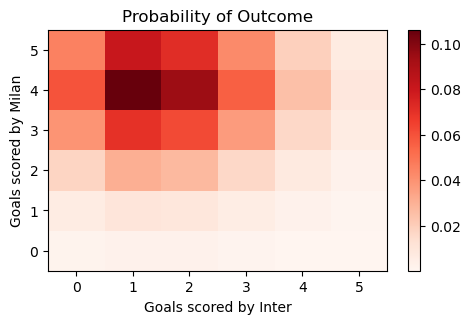

In [72]:
# Specific Poisson Predictions | Milan Derby with AC Milan as the Home Team
home_team = 'Milan'
away_team = 'Inter'

# Predicting for AC Milan VS Inter Milan
home_score_rate = poisson_model.predict(pd.DataFrame(data = {'team': home_team, 'opponent': away_team,
                                       'home':1}, index = [1]))
away_score_rate = poisson_model.predict(pd.DataFrame(data = {'team': away_team, 'opponent': home_team,
                                       'home':1}, index = [1]))

print(home_team + ' as Home Team against ' + away_team + ' can expect to score, on Average: ' + str(home_score_rate))
print(away_team + ' as Away Team against ' + home_team + ' can expect to score, on Average: ' + str(away_score_rate))

# Let's just get a Result
home_goals = np.random.poisson(home_score_rate)
away_goals = np.random.poisson(away_score_rate)
print("")
print("On Average, based on the Poisson Model, the Final Result of AC Milan VS Inter will be Expected to be:")
print(home_team + ': ' + str(home_goals[0]))
print(away_team + ': '  + str(away_goals[0]) + '\n')


# Code to Caluclate the Goals for the Match
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    
    home_goals_avg = foot_model.predict(pd.DataFrame(data = {'team': homeTeam, 
                                                            'opponent': awayTeam, 'home':1},
                                                      index = [1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data = {'team': awayTeam, 
                                                            'opponent': homeTeam, 'home':0},
                                                      index = [1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals + 1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))
    
max_goals = 5
score_matrix = simulate_match(poisson_model, home_team, away_team,max_goals)

fig = plt.figure()


# Making a 2D Histogram of Results

from pylab import rcParams
rcParams['figure.figsize'] = 12/2.54, 8/2.54
ax = fig.add_subplot(1, 1, 1)

pos = ax.imshow(score_matrix, extent = [-0.5, max_goals + 0.5, -0.5, max_goals + 0.5], aspect = 'auto', cmap = plt.cm.Reds)
fig.colorbar(pos, ax = ax)
ax.set_title('Probability of Outcome')
plt.xlim((-0.5, 5.5))
plt.ylim((-0.5, 5.5))
plt.tight_layout()
ax.set_xlabel('Goals scored by ' + away_team)
ax.set_ylabel('Goals scored by ' + home_team)
plt.show()
## fig.savefig('output/2DOutcomes.pdf' , dpi = None, bbox_inches = "tight")

In [96]:
# Home, draw, away probabilities
homewin = np.sum(np.tril(score_matrix, -1))
draw = np.sum(np.diag(score_matrix))
awaywin = np.sum(np.triu(score_matrix, 1))

print((homewin*100).round(2), '%')
print((draw*100).round(2), '%')
print((awaywin*100).round(2), '%')

28.22 %
23.22 %
47.35 %
